### Подключение библиотек

In [1]:
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [2]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### Обучение и выполнение лучшей модели

In [3]:
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения (тюник в сопровождающих файлах)

In [4]:
# Путь к тренировочному набору
path_train =  'train_house_B.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  =  'test_house_B.csv'# содержит только имя файла, без имен папок

In [5]:
# Блок(и) обучения и поверки модели, а также отбора необходимых значимых столбцов

In [6]:
data_train = pd.read_csv(path_train)
data_test = pd.read_csv(path_test)

## Эти колонки использую

In [7]:
important_col = ['2', '12', '22', '5', '25', '4', '6', '27', '24', '20']

In [8]:
X_train = data_train[important_col]
y_train = data_train['price']

In [9]:
rf_final = RandomForestRegressor(max_features='log2', n_estimators=500)

In [10]:
rf_final.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=500)

### это просто было в исходном коде на git, пусть лежит

In [11]:
y_pred = rf_final.predict(X_train)
print(mean_absolute_percentage_error(y_train,y_pred))

0.07703133776341983


In [12]:
# Блок предсказания с использованием тестового набора

In [13]:
# Маска отобраных ** НАЗВАНИЙ СТОЛБЦОВ ** для предсказания из тестового набора
mask = important_col
X_test = data_test[mask]
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict =  rf_final.predict(X_test)

(137,) (137,)
Отрицательные цены -  0
Max Error: 4,767,819
 
----------------------
   MAPE Error: 16.84
----------------------


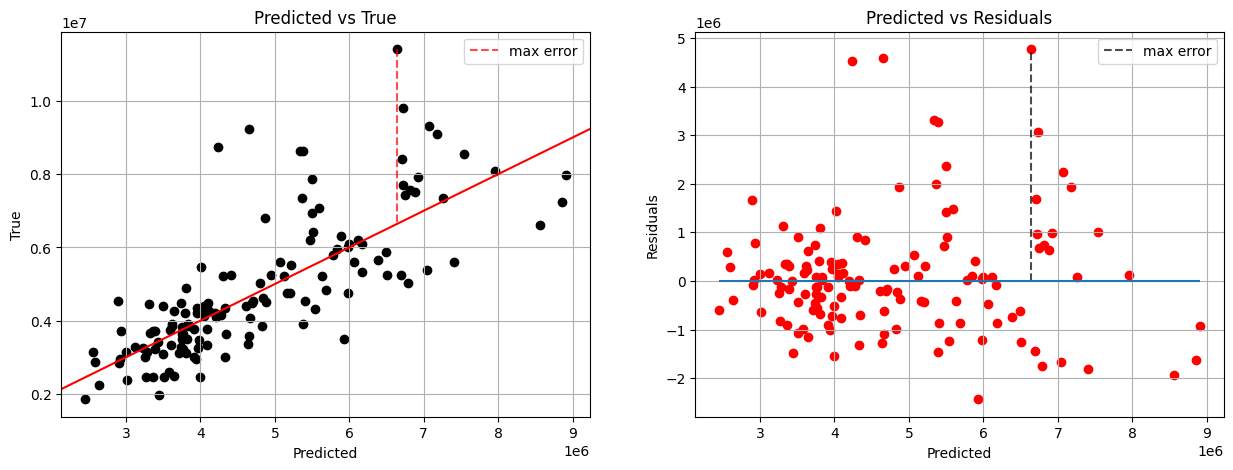

In [14]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [15]:
mask = mask

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
